In [7]:
# %env LOG_LEVEL=INFO
from pychemprojections.newman.visualization import (
    plot_newman_projection,
    get_newman_drawing_info,
)
from pychemprojections.utils.rdkit_utils import preprocess_molecule

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [3]:
input_smiles = "C(O)CC(C)C(Cl)(CC)C"

## Draw the bond line structure to figure out the carbon atom ids for Newman Projection

In [4]:
smiles_mol_prepared, mol = preprocess_molecule(input_smiles)

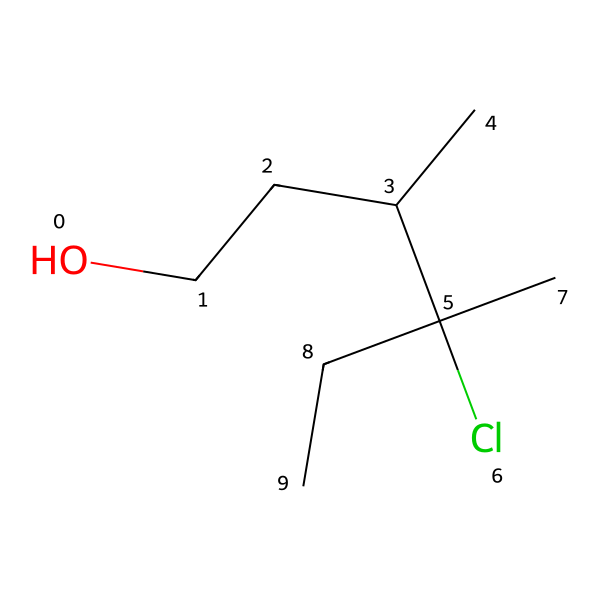

In [5]:
display_mol = Chem.MolFromSmiles(smiles_mol_prepared)
display_mol = rdMolDraw2D.PrepareMolForDrawing(display_mol)
drawer = rdMolDraw2D.MolDraw2DSVG(600, 600)
opts = drawer.drawOptions()
opts.addAtomIndices = True
drawer.DrawMolecule(display_mol)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
display(SVG(svg.replace("svg:", "")))

## Let us choose carbon atoms ids 3 and 5 for the Newman Plot

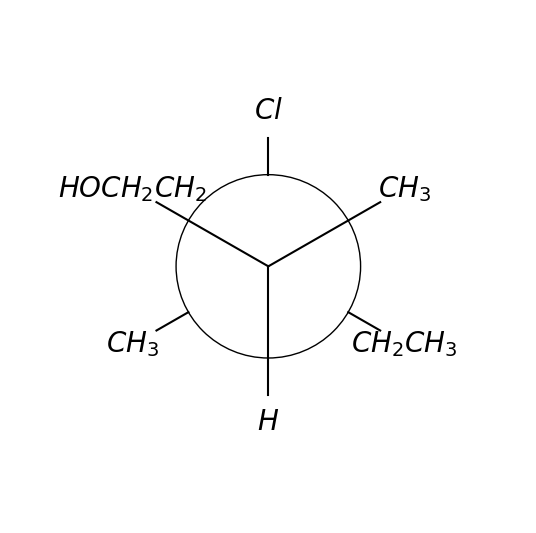

In [8]:
newman_drawing_info = get_newman_drawing_info(
    input_smiles, carbon_ids_bond_to_examine=(3, 5)
)
plot_newman_projection(newman_drawing_info)